Method via One Class SVM <br>
According to many site and video, it have better accuracy than isolation forest but with slower process time if the data set is bigger

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Load data from CSV file
df = pd.read_csv('xad07.csv')

# Split data into training and test sets
train_sz = int(len(df)*0.5)
train_dt, test_dt = df.iloc[:train_sz], df.iloc[train_sz:]

# Create and fit One-Class SVM model
clf = OneClassSVM(nu=0.01, kernel='rbf', gamma=0.1)
clf.fit(train_dt[['sensor_reading']])

# Predict labels for training and test data
y_pred_train = clf.predict(train_dt[['sensor_reading']])
y_pred_test = clf.predict(test_dt[['sensor_reading']])

# Count number of errors on training and test sets
n_err_train = y_pred_train[y_pred_train == -1].size
n_err_test = y_pred_test[y_pred_test == -1].size

# Print number of errors
print("Number of errors on training set:", n_err_train)
print("Number of errors on test set:", n_err_test)

Number of errors on training set: 485
Number of errors on test set: 428


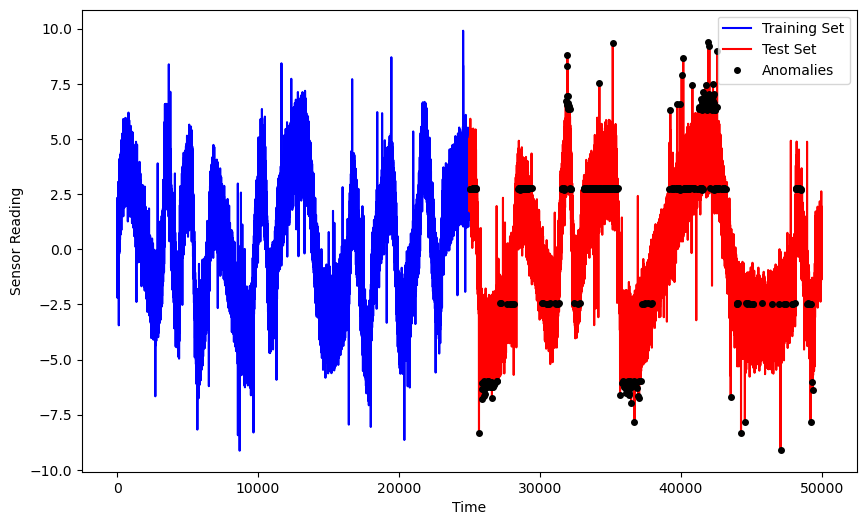

In [3]:
# Plot sensor readings over time for training and test sets
plt.figure(figsize=(10,6))
plt.plot(train_dt['t'], train_dt['sensor_reading'], 'b', markersize=2)
plt.plot(test_dt['t'], test_dt['sensor_reading'], 'r', markersize=2)
plt.plot(test_dt['t'][y_pred_test==-1], test_dt['sensor_reading'][y_pred_test==-1], 'ko', markersize=4)
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.legend(['Training Set', 'Test Set', 'Anomalies'])
plt.show()

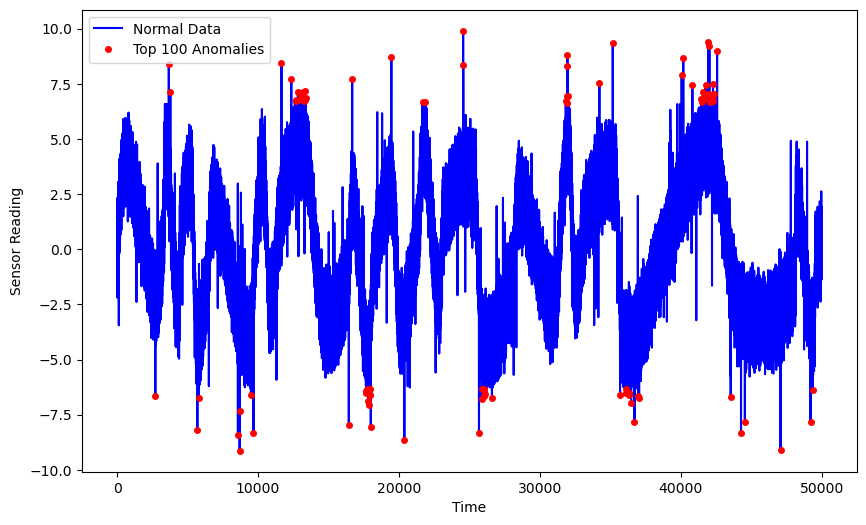

In [4]:
# Predict labels and anomaly scores for all data points
y_pred = clf.predict(df[['sensor_reading']])
df['anomaly_score'] = clf.decision_function(df[['sensor_reading']]) 

# Sort data by anomaly score and select top 100 anomalous entries
result = df.sort_values(by=['anomaly_score'])[:100]

# Plot sensor readings over time and mark top 100 anomalous entries
plt.figure(figsize=(10,6))
plt.plot(df['t'], df['sensor_reading'], 'b', markersize=2)
plt.plot(result['t'], result['sensor_reading'], 'ro', markersize=4)
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.legend(['Normal Data', 'Top 100 Anomalies'])
plt.show()

In [5]:
# Export the top 100 anomalous entries to a text file
result.to_csv('output.txt', sep='\t', index=False, columns=['t'], header=None)